In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Summary

In this notebook we follow the logic for our analysis that defines an effective nuclear-recoil Fano factor for germanium. We use the other notebooks in this directory as supporting references and present the line of logic for our publication [REF]. 

It is planned that all of the plots that go into the publication will be produced here from the data we have placed in the `data/` directory below this one. It is planned that all the data is referenced and where it came from is clear. 

The basic idea of this analysis is that there are measurements in the literature that constrain the width (second moment) of the ionization distribution for various materials. This has also been predicted by Lindhard [REF]. This variance in the number of charges produced by a nuclear recoil of a given energy far exceeds what is measured from electron recoils. In the electron recoils this is parameterized by the Fano factor and so here we define the "effective" Fano factor for nuclear recoils. 

While the width of the ionization distribution has not been important in the past because of excellent discrimination between electron- and nuclear-recoil events above about 10 keV, it is becoming more important for dark matter searches interested in lower recoil energies [REF] (SuperCDMS low threshold) and discriminationless [REF] (CDMSlite & HVeV) searches. 

# 1. Lindhard has Predicted this Variance and Dougherty has Measured it for Silicon

Dougherty has measured this effect in silicon and shown that it is near the predicted values from Lindhard [[Dough92][Dough92]]. See the notebook `silicon_Fano.ipynb` for the details of how an effective Fano factor is extracted from this silicon measurement. 

[Dough92]: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.45.2104 "Dougherty paper 1992"

The following table is a summary of those data along with the effective Fano estimate and uncertainty for each recoil energy data point measured in that publication.

Experimental uncertainties are quoted as values following the "$\pm$" symbol. The Observed width and Expected width are both in FWHM execpt for the 25.3 keV recoil energy point, which is quoted in half width at half max (HWHM). The excess fluctuation are given in 1$\sigma$. 

## Table 1 of the paper:

Si recoil energy (keV)|Observed ionization (keV)|Lindhard shift (keV)|Ionization efficiency (%)|Observed width (keV)|Expected width (keV)|Excess fluct. (%)| effective Fano
:-|:-|:-|:-|:-|:-|:-|:-
109.1$\pm$0.7|55.5$\pm$2|0.55|51.4$\pm$2|16$\pm$3|3.5$\pm$0.4|6.1$\pm$1.2|208$\pm$8
75.7 $\pm$0.4|33.3$\pm$0.4|0.31+0.94|45.6$\pm$0.5|9.6$\pm$1.0|1.1$\pm$0.3|5.3$\pm$0.6|123$\pm$2
25.3$\pm$0.3|8.90$\pm$0.1|0.074|35.5$\pm$0.6|1.30$\pm$0.04|0.75$\pm$0.1|3.6$\pm$0.3|24.3$\pm$0.2
7.50$\pm$0.03|2.01$\pm$0.02|0.012|26.9$\pm$0.4|0.55$\pm$0.07|0.24$\pm$0.01|2.8$\pm$0.4|5.75$\pm$0.12
4.15$\pm$0.15|0.93$\pm$0.02|0.008|22.5$\pm$0.5|0.32$\pm$0.06|0.236$\pm$0.005|2.2$\pm$0.9|2.35$\pm$0.39

In [2]:
import dataPython as dp
import numpy as np

lind_data0 = dp.getXYdata('data/lindhard2_OmegaepsD_fmt.txt')
lind_data1 = dp.getXYdata('data/lindhard2_OmegaepsE_fmt.txt')

lindD_e = np.asarray(lind_data0['xx'])
lindD = np.asarray(lind_data0['yy'])
lindE_e = np.asarray(lind_data1['xx'])
lindE = np.asarray(lind_data1['yy'])

In [3]:
Esi = np.vectorize(lambda x: np.sqrt(2)*2*x/(6.87758e-5*1000))

In [4]:
#create a yield model
import lindhard as lind

#lindhard
lpar = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar)
#ylind = lind.getLindhard(lpar)
ylind = lind.getLindhardSi_k(0.15)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


In [5]:
#convert the vectors
epsg = 3.8e-3 #keV average energy per electron-hole pair created


F_D = Esi(lindD_e)*(1/(epsg*ylindv(1000*Esi(lindD_e))))*lindD
F_E = Esi(lindE_e)*(1/(epsg*ylindv(1000*Esi(lindE_e))))*lindE

In [6]:
#get Dougherty Data
ddataY = dp.getXYdata_wXYerr('data/Dougherty_Yield.txt')
ddataFluct = dp.getXYdata_wXYerr('data/Dougherty_Fluct.txt')

#convert to numpy arrays
ddata_e = np.asarray(ddataFluct['xx'])
ddata_fluct = np.asarray(ddataFluct['yy'])
ddata_fluct_err = np.asarray(ddataFluct['ey'])

ddata_Y = np.asarray(ddataY['yy'])

epsg = 3.8e-3 #epsilon-gamma for silicon in keV per pair
ddata_fluct_F = (ddata_fluct/100)**2 * (ddata_e/(epsg*(ddata_Y/100)))
ddata_fluct_F_err = (ddata_fluct_err/100)**2 * (ddata_e/(epsg*(ddata_Y/100)))
                                        
print(ddata_fluct_F)
print(ddata_fluct_F_err)

[207.84410199 122.71543167  24.30600445   5.75229896   2.34923977]
[8.04341593 1.57271468 0.1687917  0.11739386 0.39315789]


## Figure 1 of the Paper:

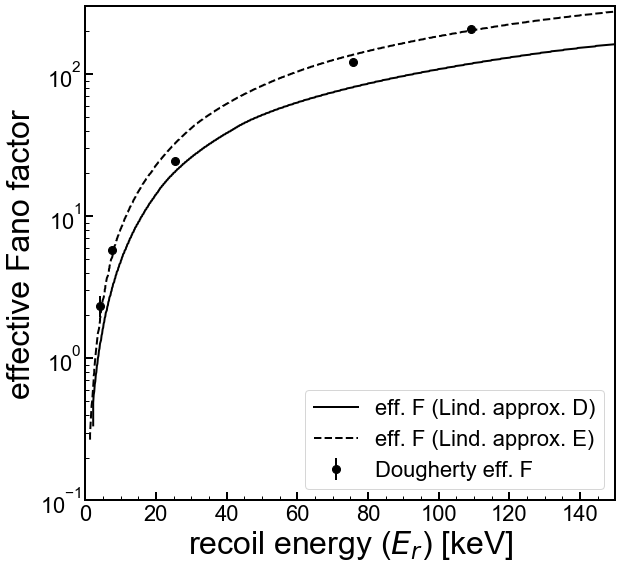

In [7]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Esi(lindD_e), F_D, 'k-', label='eff. F (Lind. approx. D)')
ax1.plot (Esi(lindE_e), F_E, 'k--', label='eff. F (Lind. approx. E)')




ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.set_xlim(Esi(0), 150)
ax1.set_ylim(0.1,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]',**axis_font)
ax1.set_ylabel('effective Fano factor',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/paper_figures/SiFano_Figure1.eps')
plt.show()

# 2. Edelweiss has Observed Anomalous NR Widening in Germanium

The 2004 EDELWEISS publication [[Edw04][Edw04]] has published a detailed and complete analysis of the measured resolutions for 7 cryogenic germanium detectors that they used for dark matter searches about ~10 keV analysis thresholds. 

In this paper it was recognized (in a similar way to the Doughterty measurement) that the measured ionization yield width was larger than expected. This effect remained even after estimating the nuclear recoil band widening based on multiple-scatters. The point in this section is to estimate how much wider the measured nuclear recoil band was than the _single-scatter_ prediction. 

[Edw04]: https://doi.org/10.1016/j.nima.2004.04.218 "EDELWEISS 2004 Publication"

The single-scatter prediction for the ionization yield width can be analytically estimated based on the ionization and heat channel resolutions. Each of those resolutions is extracted for each detector in the publication by the following functional forms (see the notebook `edelweiss_res.ipynb`):

\begin{equation}
\begin{aligned}
\sigma_I(E_I) &= \sqrt{(\sigma_I^0)^2 + (a'_I E_I)^2} \\
\sigma_H(E_H) &= \sqrt{(\sigma_H^0)^2 + (a'_H E_H)^2},
\end{aligned}
\end{equation}

where $E_H$ is a recoil energy estimator (unbiased for electron-recoils) based on the heat signal, and $E_I$ is a recoil energy estimator (again unbiased for electron-recoils) based on the ionization signal. 

In the EDELWEISS paper the recoil energy, an estimator for the true recoil energy of an event, is defined as follows:

\begin{equation}
E_r = \left(1+\frac{V}{\epsilon_{\gamma}}\right)E_H - \frac{V}{\epsilon_{\gamma}} E_I, 
\end{equation}

where $V$ is the voltage, and $\epsilon_{\gamma}$ is the average energy to create a single electron-hole pair. Finally, the ionization yield, Q, is defined as:

\begin{equation}
Q = \frac{E_I}{E_r}
\end{equation}

Given these definitons, if one _assumes_ a normal distribution for the resulting ionization yield distribution and propagates the uncertainty on Q via the equations above and a first-order Taylor expansion the result is the one published by EDELWEISS [[Edw04][Edw04]]:

\begin{equation}
\sigma_{Q}^0(E_r) = \sqrt{\frac{1}{E^2_r} \left( \left(1+\frac{V}{\epsilon_{\gamma}}\langle Q\rangle\right)^2\sigma_I^2 + \left( 1+\frac{V}{\epsilon_{\gamma}}\right)^2\langle Q\rangle^2\sigma_H^2\right)},
\end{equation}

where $\langle Q \rangle$ is the average ionization yield as a function of recoil energy. 

[Edw04]: https://doi.org/10.1016/j.nima.2004.04.218 "EDELWEISS 2004 Publication"

In order to discover how much the effective Fano factor for nuclear recoils is contributing we want to first see how much wider the nuclear recoil band is than this estimate. In the EDELWEISS paper [[Edw04][Edw04]], this is done by simply adding a constant in quadrature:

\begin{equation}
\sigma_{Q}(E_r) = \sqrt{(\sigma_{Q}^{0})^2 + C^2}
\end{equation}

The constant C comes out to be _around_ 0.04, and this is larger than the expected effect of multiple-scattering (see Section 3). 

To duplicate this fit for the EDELWEISS detector "GGA3" and add fitting uncertainties, we have first computed the full non-normal ionization yield distribution from the resolutions, it shows that the EDELWEISS analytical form very slightly underpredicts the ionization yield width. We call this function $\tilde{\sigma}_{Q}^0$. 

[Edw04]: https://doi.org/10.1016/j.nima.2004.04.218 "EDELWEISS 2004 Publication"

In [8]:
# import data from Edelweiss
import pandas as pds
res_data = pds.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

resER_data = pds.read_csv("data/edelweiss_ERwidth_GGA3_data.txt", skiprows=1, \
                         names=['E_recoil', 'sig_ER', 'sig_ER_err'], \
                         delim_whitespace=True)

resER_data = resER_data.sort_values(by='E_recoil')

print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']
E_recoil_ER = resER_data["E_recoil"]
sig_ER = resER_data["sig_ER"]
sig_ER_err = resER_data['sig_ER_err']

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


In [9]:
import h5py
filename = 'data/sims.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/'.format('ER')

xE = np.asarray(f[path+'xE'])
qbootsigs = np.asarray(f[path+'qbootsigs'])
qbootsigerrsu = np.asarray(f[path+'qbootsigerrsu'])
qbootsigerrsl = np.asarray(f[path+'qbootsigerrsl'])


f.close()

In [10]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.0381
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.0381/000/
True
(200,)


In the figure below, the functon $\tilde{\sigma}_{QER}^0$ is shown as the solid curve. This curve is the electron-recoil version of the correct single-scatter ionization yield width $\tilde{\sigma}_{Q}^0$. The dashed curve is the resolution predicted from the EDELWEISS publication assuming a normal distribution for the ionization at each measured recoil energy. 

Both of these are using the adjusted resolution parameter $a_H^{\prime}$ equal to:

\begin{equation}
a_H^{\prime} = \frac{0.0386}{2\sqrt{2\log(2)}}.
\end{equation}

This adjustment was done in the EDELWEISS publication to fit the measured width of the electron recoil band [[Edw04][Edw04]]. 

[Edw04]: https://doi.org/10.1016/j.nima.2004.04.218 "EDELWEISS 2004 Publication"


Also shown in the figure is a high-statistics set of simulated data with the same resolutions (same value of $a_H^{\prime}$) and the experimental data of EDELWEISS [[Edw04][Edw04]].

## Figure 2a of the Paper:

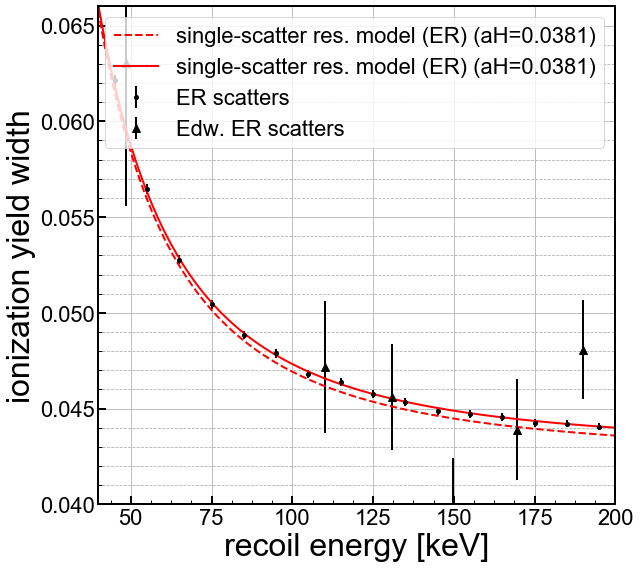

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/paper_figures/ERyieldWidth_Figure2a.eps')
plt.show()

With the value of $a_H^{\prime}$ specified by the fit above, it is possible to calculate the expected single-scatter nuclear recoil ionization yield width as a function of energy, $\tilde{\sigma}_{Q}^0(E_r)$. 

With this function in hand, we can then repeat the fit done in the EDELWEISS paper using the corrected version of the equation above:

\begin{equation}
\sigma_{Q} = \sqrt{(\tilde{\sigma}_{Q}^0)^2 + C^2}.
\end{equation}

Furthermore, we allow the parameter C to be a linear function of energy, to improve the fit quality, $C = C_0 + mE_r$. This fit is displayed in the figure below. 

In [12]:
filename = 'data/mcmc_fits.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','edwdata')

Cms = np.asarray(f[path+'Cms'])
slope = np.asarray(f[path+'m'])
samples = np.asarray(f[path+'samples'])
sampsize = np.asarray(f[path+'sampsize'])
xl = np.asarray(f[path+'Er'])
upvec = np.asarray(f[path+'Csig_u'])
dnvec = np.asarray(f[path+'Csig_l'])
Sigss = np.asarray(f[path+'Sigss'])

print(Cms)
f.close()

0.03132154537261885


## Figure 2b of the Paper:

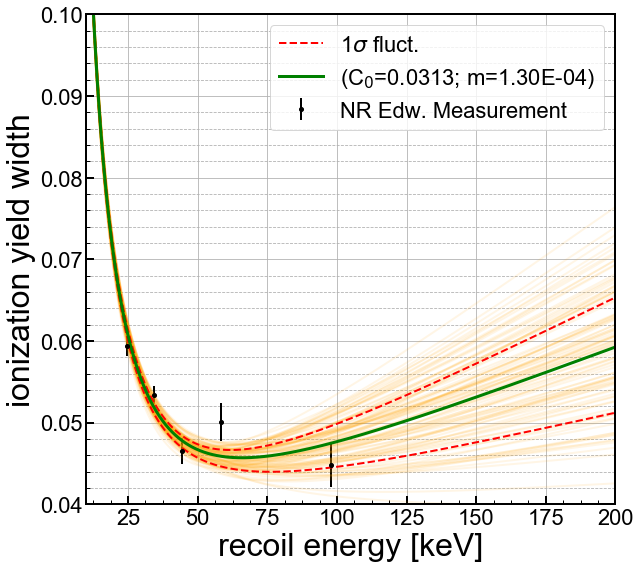

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')

ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/paper_figures/EdwyieldWidthFit_Figure2b.eps')
plt.show()

# 3. Multiple-Scattering Cannot Account for All of the Yield Broadening

An obvious candidate, _aside_ from an intrinsic effective Fano factor, that might account for the yield broadening observed over the single-scatter prediction is multiple-scattering. If a neutron enters the detector and scatters more than once, the known non-linearity of the average ionization yield for each collison **_guarantees_** that the total yield will fluctuate to lower values than expected given the **_total_** energy deposited. 

We use a Monte Carlo simulation of neutron scattering from a $^{252}$Cf source to approximate this effect. The following empirical single-scatter yield model is used since it approximates the EDELWEISS data fairly well:

\begin{equation}
\langle Q \rangle = 0.16E_r^{0.18}. 
\end{equation}

We apply this yield model to _each individual scatter_ in the simulated data and then sum to obtain the expected measured ionization yield, also folding in the measured EDELWEISS sensor resolutions appropriately. 

In [14]:
filename = 'data/mcmc_fits.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','multiples')

Cms = np.asarray(f[path+'Cms'])
slope = np.asarray(f[path+'m'])
samples = np.asarray(f[path+'samples'])
sampsize = np.asarray(f[path+'sampsize'])
xl = np.asarray(f[path+'Er'])
upvec = np.asarray(f[path+'Csig_u'])
dnvec = np.asarray(f[path+'Csig_l'])
Sigss = np.asarray(f[path+'Sigss'])

f.close()

In [15]:
filename = 'data/sims.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/'.format('NR')

xE = np.asarray(f[path+'xE'])
qbootsigs = np.asarray(f[path+'qbootsigs'])
qbootsigerrsu = np.asarray(f[path+'qbootsigerrsu'])
qbootsigerrsl = np.asarray(f[path+'qbootsigerrsl'])


f.close()

## Figure 3 of the Paper:

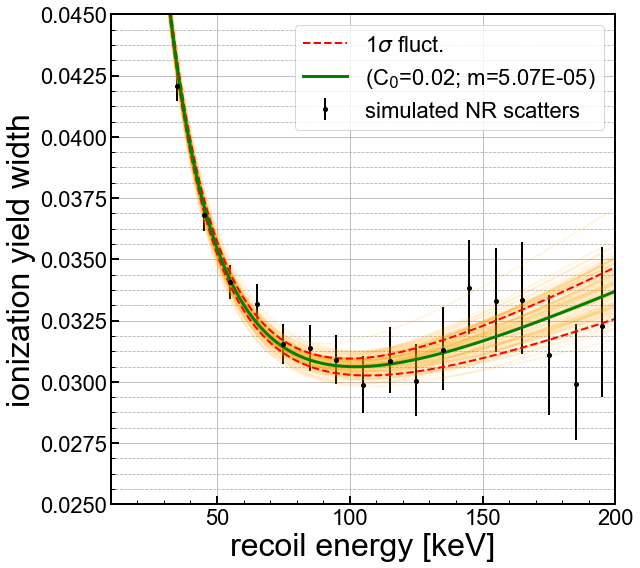

In [16]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')

ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
         color='k', marker='o', markersize=4,linestyle='none',label='simulated NR scatters', linewidth=2)

ymin = 0.025
ymax = 0.045



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/paper_figures/MSyieldWidthFit_Figure3.eps')
plt.show()

# 4. This Implies a Certain "Effective" Fano Factor

It is clear from the previous sections that the additions that need to be added to the account for the simulated multiple scatters are not as large as those required to explain the EDELWEISS data. This means that there is an "extra" unaccounted variance that needs to be added to the ionization yield. 

We take the position that this variance is the intrinsic variance in the number of electron-hole pairs produced in a primary nuclear recoil reaction. Since this is analagous the the variance that is parameterized by the Fano factor for electron recoils, we call this the effective Fano factor for nuclear recoils. 

We note that physically, this variance comes from a different mechanism than for electron recoils. In the nuclear recoil case most of the variance comes from the variation of the energy put into the phonon system from the primary recoil. In electron recoils there is little to no energy put into the phonon system from the primary recoil. Therefore, it is not surprising that the effective Fano factor can be significantly larger than the electron-recoil counterpart. 

Since we have accurately modeled the ionization yield variance without severe approximation (we do assume the number of electron-hole pairs is distributed normally; a very mild assumption when large numbers of pairs are expected), we can also include an intrinsic Fano factor in the modeling. Effectively we make the following replacement:

\begin{equation}
\tilde{\sigma}_{Q}^0(E_r) \rightarrow \tilde{\sigma}_{Q}^0(E_r;F_n),
\end{equation}

Where $F_n$ is the effective nuclear recoil Fano factor. 

To extract the effective Fano factor for the nuclear recoils we need to come up with a parameter C$_F$ which is a function of recoil energy and is a corrected version of the measured "widening" parameter C from the EDELWEISS data and the widening parameter C$^{\prime}$ from the effect of multiple-scattering. 

The corrected parameter C$_F$ is assumed to be due to the effective Fano factor for nuclear recoils and is given by:

\begin{equation}
C_F = \sqrt{C^2 - C^{\prime 2}}.
\end{equation}

This parameter can be used to extract the effective Fano factor at a given recoil energy by applying our $\tilde{E}_r$-Q plane model (from `QEr_2D_joint.ipynb`), with an arbitrary Fano factor, until the correct ionization yield (Q) width is obtained (see `Qwidth_confirm.ipynb`). Mathematically this corresponds to adjusting F$_n$ until the following equality is satisfied:

\begin{equation}
\tilde{\sigma}_{Q}^0(E_r;F_n) = \sqrt{\left(\tilde{\sigma}_{Q}^0(E_r)\right)^2 + C_F^2}.
\end{equation}

## Uncertainties on F$_n$

Since both C and C$^{\prime}$ have uncertainty it is necessary to propagate that uncertainty to F$_n$. If we call the uncertainty (1$\sigma$) on C $\sigma$ and on C$^{\prime}$ $\sigma^{\prime}$, then the uncertainty on C$_F$ is given by:

\begin{equation}
\sigma_{C_F} = \frac{1}{\sqrt{C^2 - C^{\prime 2}}} \sqrt{C^2 \sigma^2 + C^{\prime 2} \sigma^{\prime 2}}.
\end{equation}

These uncertainties are propagated to the extracted F$_n$ by solving the following equality for F$^+_n$ and F$^-_n$ which represent the corresponding upper and lower boundaries on F$_n$. 

\begin{equation}
\begin{aligned}
\tilde{\sigma}_{Q}^0(E_r;F^+_n) &= \sqrt{\left(\tilde{\sigma}_{Q}^0(E_r)\right)^2 + \left(C_F + \sigma_{C_F}\right)^2} \\
\tilde{\sigma}_{Q}^0(E_r;F^-_n) &= \sqrt{\left(\tilde{\sigma}_{Q}^0(E_r)\right)^2 + \left(C_F - \sigma_{C_F}\right)^2} 
\end{aligned}
\end{equation}

In [17]:
import fano_calc as fc

(Er,F,Fup,Fdn) = fc.RWCalcFMCMC('data/mcmc_fano.h5')

GGA3/4.0/5.556E-02/0.0381/
True


# Figure 4 of the Paper:

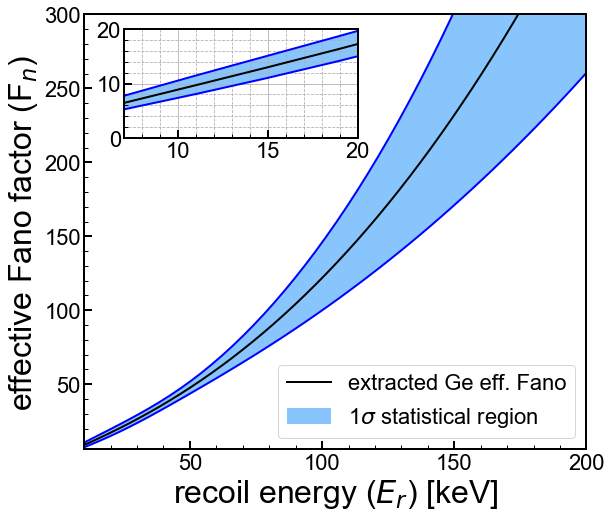

In [18]:
#set up a plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

#ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
#             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Er, F, 'k-', label='extracted Ge eff. Fano')
ax1.plot (Er, Fup, 'b', label='')
ax1.plot (Er, Fdn, 'b', label='')


blue = '#118DFA'
ax1.fill_between(Er,Fdn,Fup,facecolor=blue,alpha=0.5,label='1$\sigma$ statistical region')


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(10, 200)
ax1.set_ylim(6,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]',**axis_font)
ax1.set_ylabel('effective Fano factor (F$_n$)',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})


###Make inset
bbox_ll_x = 0.07
bbox_ll_y = -0.0225
bbox_w = 1
bbox_h = 1
eps = 0.01
axins = inset_axes(ax1, height="25%", width="50%", bbox_to_anchor=(bbox_ll_x,bbox_ll_y,bbox_w-bbox_ll_x,bbox_h), loc='upper left',bbox_transform=ax1.transAxes)
#ax1.add_patch(plt.Rectangle((bbox_ll_x, bbox_ll_y+eps), bbox_w-eps-bbox_ll_x, bbox_h-eps, ls="--", ec="c", fc="None",
#                           transform=ax1.transAxes))

#axins = plt.axes([0,0,1,1])
#axins_pos = InsetPosition(ax3, [0.25, 0.65, 0.7, 0.3])
#axins.set_axes_locator(axins_pos)

# larger region than the original image
x1, x2, y1, y2 = 7, 20, 0, 20
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.plot (Er, F, 'k-', label='')
axins.plot (Er, Fup, 'b', label='')
axins.plot (Er, Fdn, 'b', label='')
axins.fill_between(Er,Fdn,Fup,facecolor=blue,alpha=0.5,label='')
axins.yaxis.grid(True,which='minor',linestyle='--')
axins.xaxis.grid(True,which='minor',linestyle='--')
axins.grid(True)
####

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)
  axins.spines[axis].set_linewidth(2)

#plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.savefig('figures/paper_figures/GeFano_Figure4.eps')
plt.show()